## **Import Important Libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings('ignore')
sns.set()
%matplotlib inline


## **read dataset**

In [28]:
df = pd.read_csv("/kaggle/input/salary-prediction-data/salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


## **Data Exploration**

In [29]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [31]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df['Location'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [34]:
df['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

In [35]:
df['Job_Title'].value_counts()

Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64

In [36]:
df['Age'].value_counts()

Age
27    33
60    33
58    30
59    30
62    30
21    30
24    29
20    28
41    28
63    28
44    27
45    25
49    25
54    25
61    24
25    24
23    24
42    24
31    23
48    23
26    22
57    22
50    22
36    22
37    21
64    21
56    21
52    20
40    20
43    19
39    19
22    19
29    19
34    19
53    18
33    18
35    18
47    16
28    15
46    15
51    15
38    15
30    14
55    14
32    13
Name: count, dtype: int64

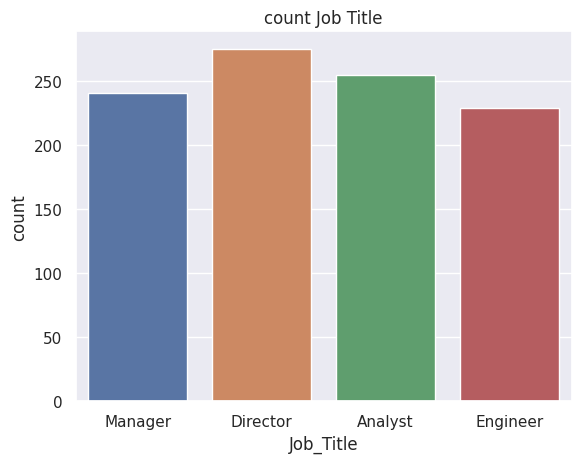

In [37]:

job_titles = df['Job_Title']
sns.countplot(x='Job_Title', data=df)
plt.title('count Job Title')
plt.show()

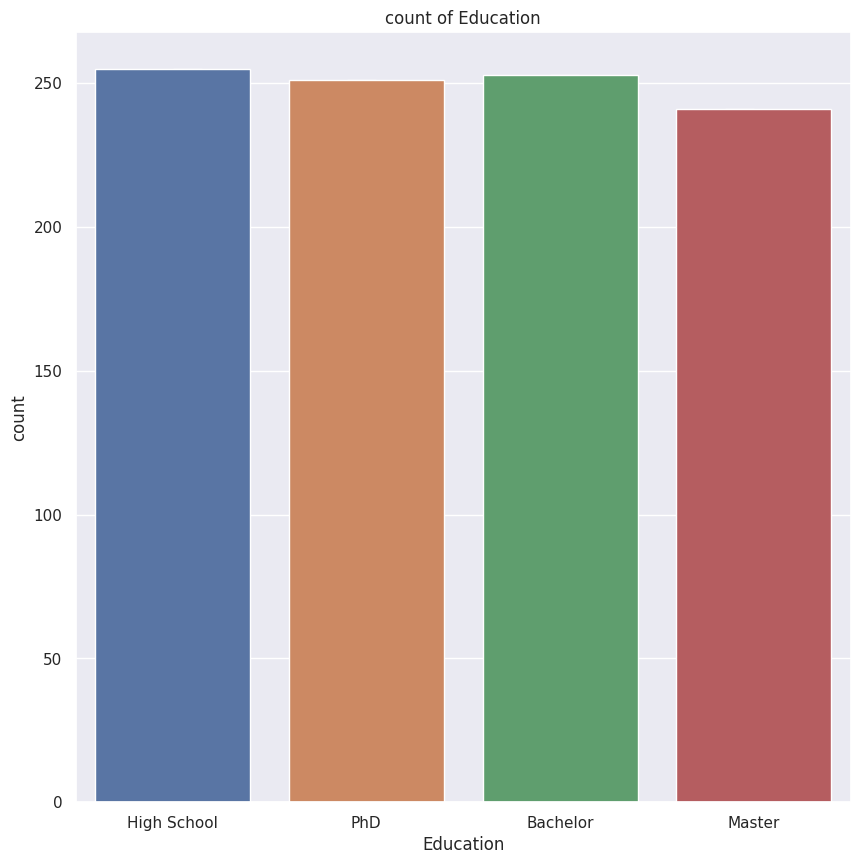

In [38]:
df['Education'].hist(bins=20, figsize=(10, 10))
sns.countplot(x=df['Education'])
salaries = df['Education']
plt.title('count of Education')
plt.show()

## **Visualizing data**

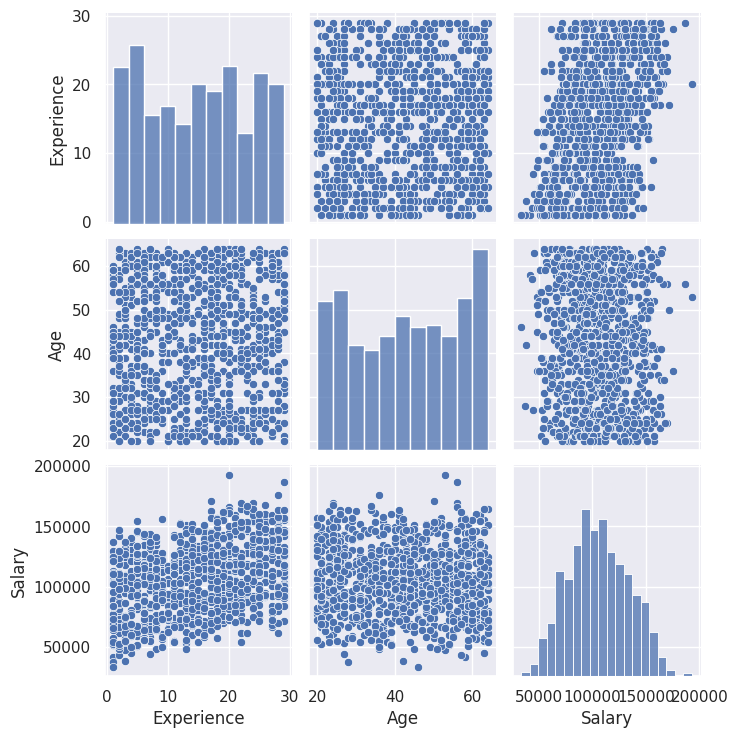

In [39]:
sns.pairplot(df)

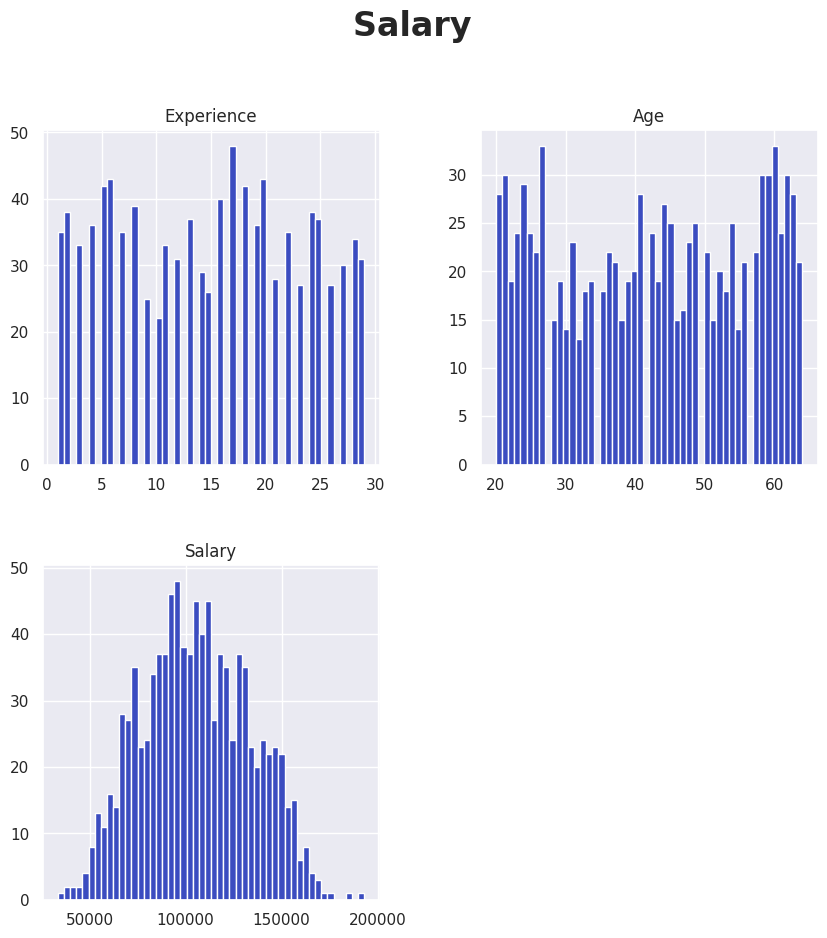

In [40]:
df.hist(bins=50, figsize=(10, 10), color=plt.get_cmap('coolwarm')(np.linspace(0, 1, 1)) , )
hist_features = plt.suptitle('Salary ',
                             y =1,
                             fontsize=24,
                             fontweight='bold' )

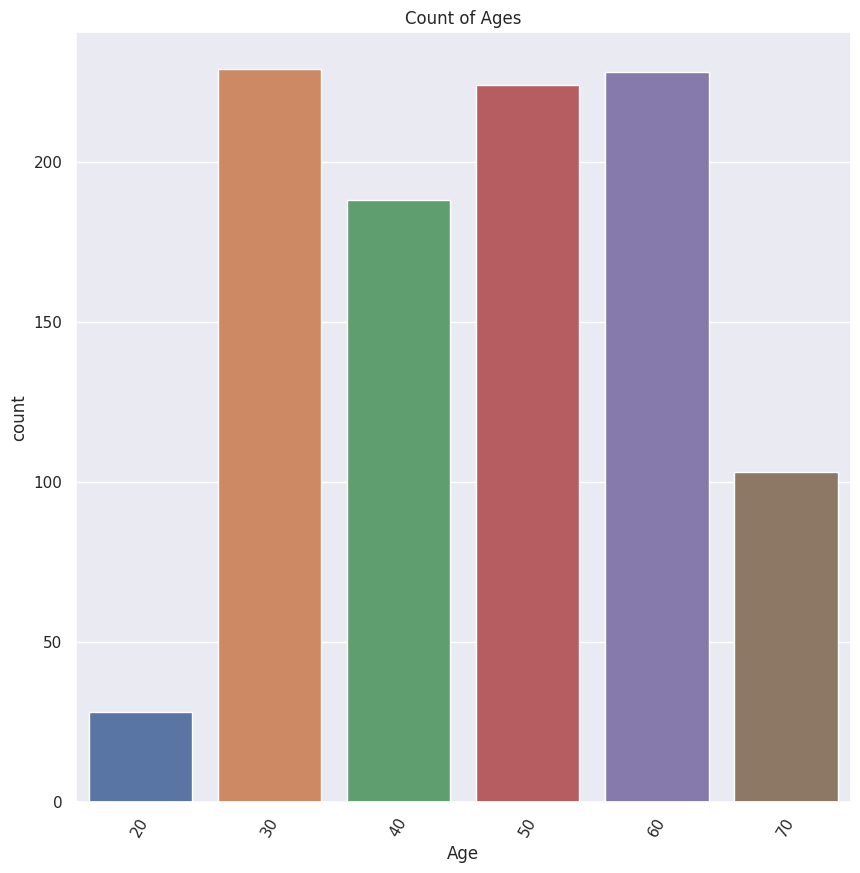

In [41]:
df['Age'] = pd.cut(df['Age'], bins=[10,20, 30, 40, 50, 60, 70], labels=[20, 30, 40, 50, 60, 70])
df['Age'].hist(bins=20, figsize=(10, 10))
sns.countplot(x='Age', data=df)
plt.title('Count of Ages')
plt.xticks(rotation=60)
plt.show()

## **Data Preprocessing**

In [42]:
x = df.iloc[ :,:-1]
x.head()

,Education,Experience,Location,Job_Title,Age,Gender
0,High School,8,Urban,Manager,70,Male
1,PhD,11,Suburban,Director,60,Male
2,Bachelor,28,Suburban,Manager,70,Female
3,High School,29,Rural,Director,50,Male
4,PhD,25,Urban,Analyst,30,Female


In [43]:
y = df.iloc[ :,-1:]
y.head()

,Salary
0,84620.053665
1,142591.255894
2,97800.255404
3,96834.671282
4,132157.786175


In [44]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female': 0})

In [45]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Location'] =le.fit_transform(df['Location'])
df['Job_Title'] =le.fit_transform(df['Job_Title'])
df['Gender'] =le.fit_transform(df['Gender'])
df2 = df.copy()
df2

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,70,1,84620.053665
1,3,11,1,1,60,1,142591.255894
2,0,28,1,3,70,0,97800.255404
3,1,29,0,1,50,1,96834.671282
4,3,25,2,0,30,0,132157.786175
...,...,...,...,...,...,...,...
995,1,8,1,0,30,0,64683.389864
996,1,24,2,2,30,0,74468.205020
997,2,18,0,0,50,1,98207.026024
998,0,27,1,1,40,0,108544.922720


## **spliting data**

In [52]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 7), (250, 7), (750, 7), (250, 7))

In [53]:
scaler = StandardScaler()
x = scaler.fit_transform(df2)
y= scaler.transform(df2)
x

array([[-0.43689092, -0.81216855,  1.28004782, ...,  1.66203054,
         0.968496  , -0.74136845],
       [ 1.34633733, -0.45232427,  0.04328664, ...,  0.93814964,
         0.968496  ,  1.31122973],
       [-1.32850505,  1.58679335,  0.04328664, ...,  1.66203054,
        -1.03252879, -0.27469436],
       ...,
       [ 0.45472321,  0.3873124 , -1.19347454, ...,  0.21426875,
         0.968496  , -0.26029175],
       [-1.32850505,  1.46684525,  0.04328664, ..., -0.50961215,
        -1.03252879,  0.10574427],
       [-0.43689092,  1.22694906,  1.28004782, ...,  0.21426875,
        -1.03252879, -1.22089011]])

In [54]:
y

array([[-0.43689092, -0.81216855,  1.28004782, ...,  1.66203054,
         0.968496  , -0.74136845],
       [ 1.34633733, -0.45232427,  0.04328664, ...,  0.93814964,
         0.968496  ,  1.31122973],
       [-1.32850505,  1.58679335,  0.04328664, ...,  1.66203054,
        -1.03252879, -0.27469436],
       ...,
       [ 0.45472321,  0.3873124 , -1.19347454, ...,  0.21426875,
         0.968496  , -0.26029175],
       [-1.32850505,  1.46684525,  0.04328664, ..., -0.50961215,
        -1.03252879,  0.10574427],
       [-0.43689092,  1.22694906,  1.28004782, ...,  0.21426875,
        -1.03252879, -1.22089011]])

## **evaluate_model**

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, mse, rmse, r2_square

## ***models***

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "kn regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor()
}

In [57]:
models_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    #model prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #model evaluation
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    models_list.append(list(models.keys())[i])

    print("model training performance")

    print("mean absolute error", train_mae)
    print("mean squared error", train_mse)
    print("root mean squared error", train_rmse)
    print("r2 square", train_r2)

    print('------------------------------')
    print("model testing performance")
    print("mean absolute error", test_mae)
    print("mean squared error", test_mse)
    print("root mean squared error", test_rmse)
    print("r2 square", test_r2)

    r2_list.append(test_r2)

Linear Regression
model training performance
mean absolute error 7.188225709109375e-16
mean squared error 8.106313125525801e-31
root mean squared error 9.003506608830696e-16
r2 square 1.0
------------------------------
model testing performance
mean absolute error 7.394687695753369e-16
mean squared error 8.63309539699667e-31
root mean squared error 9.291445203517412e-16
r2 square 1.0
kn regressor
model training performance
mean absolute error 0.1344823104531109
mean squared error 0.04213451823780195
root mean squared error 0.20526694385068908
r2 square 0.9574638570215699
------------------------------
model testing performance
mean absolute error 0.1781608294315126
mean squared error 0.06883588343592807
root mean squared error 0.26236593421389154
r2 square 0.9327303409449061
Decision Tree
model training performance
mean absolute error 0.0
mean squared error 0.0
root mean squared error 0.0
r2 square 1.0
------------------------------
model testing performance
mean absolute error 0.23148

In [58]:
pd.DataFrame(list(zip(models_list, r2_list)), columns = ['model name', 'r2_score']).sort_values(by = ['r2_score'], ascending = False)

,model name,r2_score
0,Linear Regression,1.000000
4,XGB Regressor,0.999869
1,kn regressor,0.932730
3,Random Forest Regressor,0.915969
2,Decision Tree,0.817915


In [59]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted')

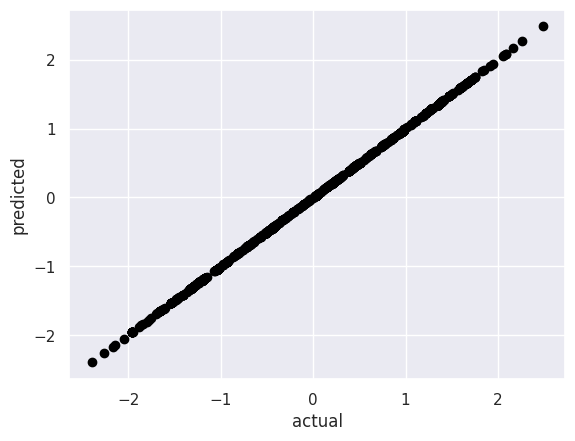

In [60]:
plt.scatter(y_test, y_pred, c= 'black', cmap= 'kde')
plt.xlabel('actual')
plt.ylabel('predicted')

In [61]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

pred_df = pd.DataFrame({
    'Actual values': y_test,
    'Predicted Values': y_pred,
    'Difference': y_test - y_pred
})
pred_df 

,Actual values,Predicted Values,Difference
0,-1.328505,-1.328505,1.110223e-15
1,-0.212428,-0.212428,8.604228e-16
2,-1.193475,-1.193475,2.220446e-16
3,0.488514,0.488514,6.106227e-16
4,0.938150,0.938150,1.110223e-15
...,...,...,...
1745,0.043287,0.043287,3.191891e-16
1746,0.488514,0.488514,7.216450e-16
1747,0.938150,0.938150,-4.440892e-16
1748,-1.032529,-1.032529,2.220446e-16


In [62]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted')

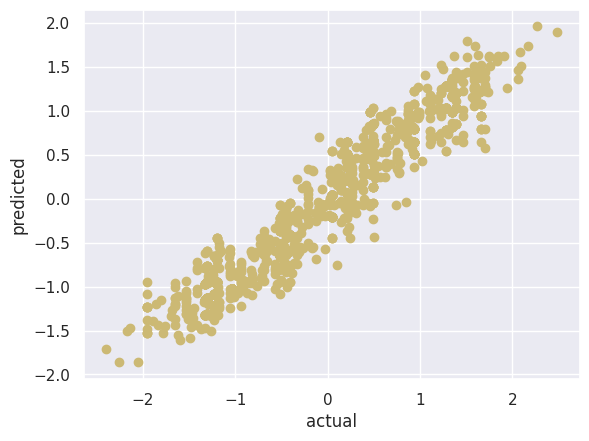

In [63]:
plt.scatter(y_test, y_pred,c='y' ,cmap= 'kde')
plt.xlabel('actual')
plt.ylabel('predicted')

In [64]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

pred_df = pd.DataFrame({
    'Actual values': y_test,
    'Predicted Values': y_pred,
    'Difference': y_test - y_pred})
pred_df


,Actual values,Predicted Values,Difference
0,-1.328505,-1.328505,0.000000
1,-0.212428,0.003478,-0.215907
2,-1.193475,-1.193475,0.000000
3,0.488514,0.129312,0.359201
4,0.938150,0.938150,0.000000
...,...,...,...
1745,0.043287,0.043287,0.000000
1746,0.488514,0.129312,0.359201
1747,0.938150,0.938150,0.000000
1748,-1.032529,-1.032529,0.000000


In [65]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted')

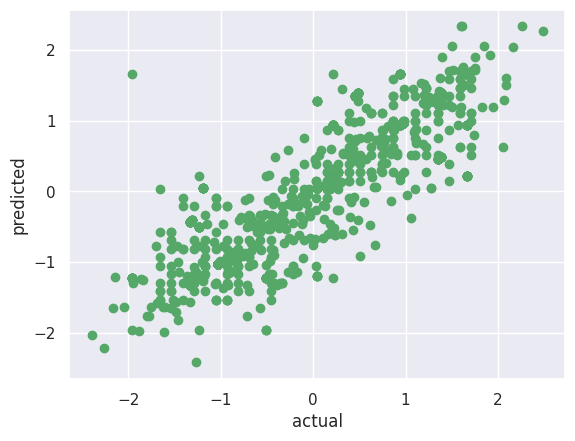

In [66]:
plt.scatter(y_test, y_pred, c = 'g')
plt.xlabel('actual')
plt.ylabel('predicted')

In [67]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

pred_df = pd.DataFrame({
    'Actual values': y_test,
    'Predicted Values': y_pred,
    'Difference': y_test - y_pred})
pred_df 

,Actual values,Predicted Values,Difference
0,-1.328505,-1.328505,0.000000
1,-0.212428,-0.092480,-0.119948
2,-1.193475,-1.193475,0.000000
3,0.488514,0.488514,0.000000
4,0.938150,0.938150,0.000000
...,...,...,...
1745,0.043287,0.043287,0.000000
1746,0.488514,0.488514,0.000000
1747,0.938150,0.938150,0.000000
1748,-1.032529,-1.032529,0.000000


In [68]:
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted')

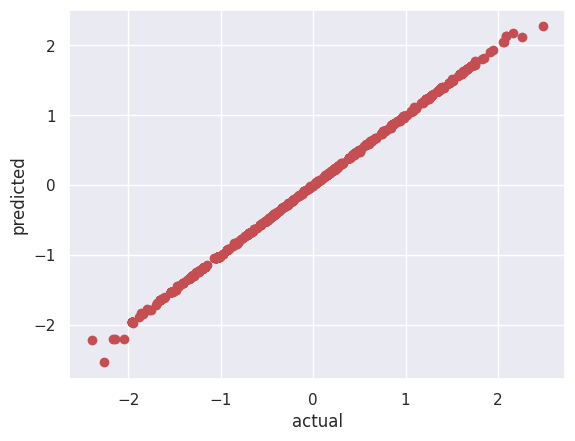

In [69]:
plt.scatter(y_test, y_pred, c = 'r')
plt.xlabel('actual')
plt.ylabel('predicted')

In [70]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

pred_df = pd.DataFrame({
    'Actual values': y_test,
    'Predicted Values': y_pred,
    'Difference': y_test - y_pred})
pred_df 

,Actual values,Predicted Values,Difference
0,-1.328505,-1.328449,-5.592065e-05
1,-0.212428,-0.212403,-2.500184e-05
2,-1.193475,-1.193426,-4.852666e-05
3,0.488514,0.488514,-2.210728e-07
4,0.938150,0.938121,2.856372e-05
...,...,...,...
1745,0.043287,0.043288,-1.474077e-06
1746,0.488514,0.488514,-2.210728e-07
1747,0.938150,0.938121,2.856372e-05
1748,-1.032529,-1.032494,-3.519884e-05


In [71]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'predicted')

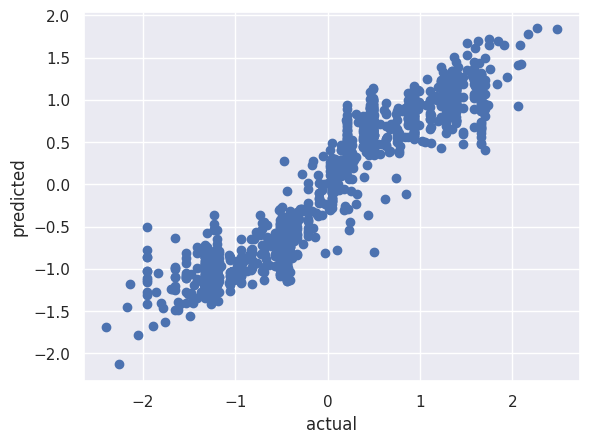

In [72]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

In [73]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

pred_df = pd.DataFrame({
    'Actual values': y_test,
    'Predicted Values': y_pred,
    'Difference': y_test - y_pred})
pred_df 

,Actual values,Predicted Values,Difference
0,-1.328505,-1.239344,-8.916141e-02
1,-0.212428,-0.297591,8.516315e-02
2,-1.193475,-1.020328,-1.731466e-01
3,0.488514,0.641174,-1.526606e-01
4,0.938150,0.742702,1.954478e-01
...,...,...,...
1745,0.043287,0.129860,-8.657328e-02
1746,0.488514,0.883635,-3.951215e-01
1747,0.938150,0.858523,7.962690e-02
1748,-1.032529,-1.032529,8.881784e-16


***If you liked this notebook, please do upvote.***
    This study was carried out by  novice who have just entered the world of machine learning.
    Any questions, suggestions, criticism or feedback are highly appreciated.

***Thank You!***